In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mbti = pd.read_csv('Combined_songs - Combined_songs.csv')
mbti = mbti.drop(columns=['uri','id','analysis_url','track_href'])
mbti.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,MBTI
0,0.487,0.716,5,-6.294,1,0.0348,0.00873,0.000203,0.1340,0.5940,104.980,audio_features,163448,4,ENFJ
1,0.560,0.936,3,-5.835,1,0.0439,0.00847,0.000000,0.1610,0.3710,112.960,audio_features,218013,4,ENFJ
2,0.494,0.632,5,-6.890,1,0.0342,0.68200,0.000000,0.0869,0.0797,147.873,audio_features,274693,4,ENFJ
3,0.574,0.555,6,-6.478,0,0.0357,0.24400,0.000011,0.2530,0.5720,159.192,audio_features,208614,4,ENFJ
4,0.537,0.863,7,-4.460,1,0.0446,0.00201,0.000000,0.2010,0.4840,97.020,audio_features,203587,4,ENFJ


In [5]:
mbti['MBTI'].unique()

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [6]:
ext = mbti[mbti['MBTI'].isin(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP'])]
ext.count()

danceability        67882
energy              67882
key                 67882
loudness            67882
mode                67882
speechiness         67882
acousticness        67882
instrumentalness    67882
liveness            67882
valence             67882
tempo               67882
type                67882
duration_ms         67882
time_signature      67882
MBTI                67882
dtype: int64

In [7]:
int = mbti[mbti['MBTI'].isin(['INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'])]
int.count()

danceability        74672
energy              74672
key                 74672
loudness            74672
mode                74672
speechiness         74672
acousticness        74672
instrumentalness    74672
liveness            74672
valence             74672
tempo               74672
type                74672
duration_ms         74672
time_signature      74672
MBTI                74672
dtype: int64

In [8]:
mbti['MBTI'].value_counts()

MBTI
INFP    12099
ENFP    11631
INFJ    11498
ESTP    11352
ENFJ    11076
INTJ    10715
INTP     9618
ENTP     9120
ISTP     8862
ENTJ     8656
ISFP     8490
ESFP     7788
ISFJ     7349
ISTJ     6041
ESTJ     4441
ESFJ     3818
Name: count, dtype: int64

#### Sum Stats in energy, tempo

In [9]:
e_energy = ext['energy'].describe()
e_tempo = ext['tempo'].describe()

print(e_energy, e_tempo)

count    67882.000000
mean         0.654835
std          0.206206
min          0.000086
25%          0.524000
50%          0.683000
75%          0.819000
max          1.000000
Name: energy, dtype: float64 count    67882.000000
mean       122.343524
std         28.718503
min          0.000000
25%        100.004000
50%        120.175000
75%        140.013000
max        241.808000
Name: tempo, dtype: float64


In [10]:
e_mean_energy_mbti = ext.groupby('MBTI')['energy'].mean()

In [11]:
e_mean_tempo_mbti = ext.groupby('MBTI')['tempo'].mean()

In [13]:
ext_means = pd.DataFrame({
    'MBTI':e_mean_energy_mbti.index,
    'e_mean_energy_mbti' : e_mean_energy_mbti.values,
    'e_mean_tempo_mbti': e_mean_tempo_mbti.values})

Text(0.5, 1.0, 'Extroverted Energy vs Tempo')

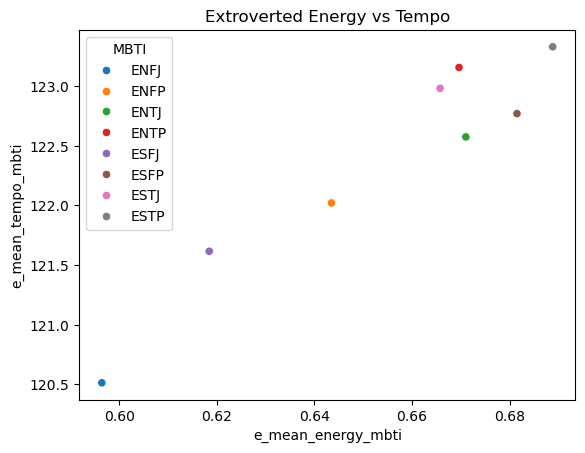

In [35]:
sns.scatterplot( data = ext_means, x ='e_mean_energy_mbti' ,y='e_mean_tempo_mbti', hue ='MBTI' )
plt.title('Extroverted Energy vs Tempo')

In [15]:
i_tempo = int['tempo'].describe()
i_energy = int['energy'].describe()

print(i_tempo, i_energy)

count    74672.000000
mean       121.076744
std         29.842483
min          0.000000
25%         97.396500
50%        119.990500
75%        140.051000
max        222.605000
Name: tempo, dtype: float64 count    74672.000000
mean         0.597053
std          0.230380
min          0.000000
25%          0.436000
50%          0.620000
75%          0.785000
max          0.999000
Name: energy, dtype: float64


In [16]:
i_mean_energy_mbti = int.groupby('MBTI')['energy'].mean()
i_mean_tempo_mbti = int.groupby('MBTI')['tempo'].mean()

In [36]:
int_means = pd.DataFrame({
    'MBTI':i_mean_energy_mbti.index,
    'i_mean_energy_mbti' : i_mean_energy_mbti.values,
    'i_mean_tempo_mbti': i_mean_tempo_mbti.values})

Text(0.5, 1.0, 'Introverted Energy vs Tempo')

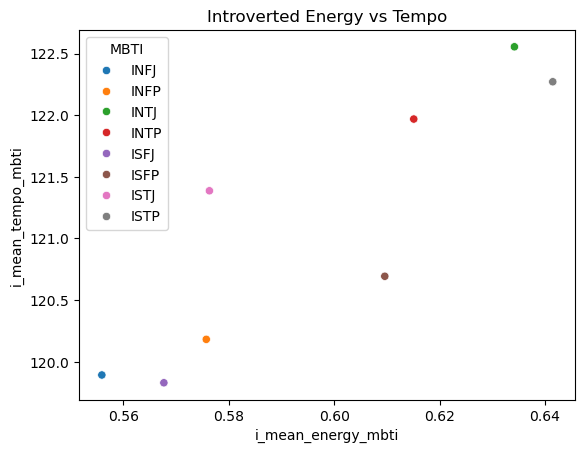

In [38]:
sns.scatterplot( data = int_means, x ='i_mean_energy_mbti' ,y='i_mean_tempo_mbti', hue ='MBTI' )
plt.title('Introverted Energy vs Tempo')

# Regression Prediction 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [28]:
df_encoded = pd.get_dummies(mbti, columns=['MBTI'], drop_first=True)


In [29]:
X = df_encoded[['energy'] + [col for col in df_encoded.columns if col.startswith('MBTI')]]
y = df_encoded['tempo'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [33]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = regressor.score(X_test, y_test)
print('mse:' + str(mse), 'r2:' + str(r2))


mse:831.024446024466 r2:0.03575020201819834
